Ex2: Matched Filtering in Practical

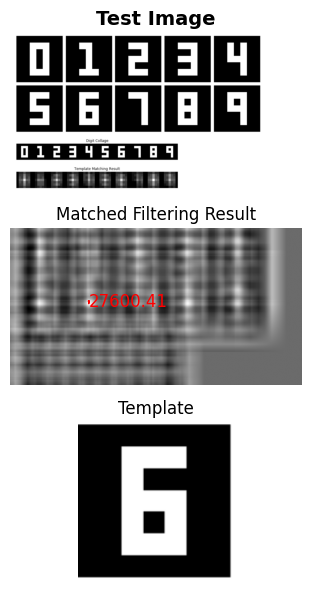

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load ảnh test và template
image = cv2.imread("result.png", cv2.IMREAD_GRAYSCALE)
template = cv2.imread("number_6.png", cv2.IMREAD_GRAYSCALE)

# Resize template nếu lớn hơn ảnh test
h_img, w_img = image.shape
h_tpl, w_tpl = template.shape
if h_tpl > h_img or w_tpl > w_img:
    scale = 0.9 * min(h_img / h_tpl, w_img / w_tpl)
    template = cv2.resize(template, (int(w_tpl * scale), int(h_tpl * scale)), interpolation=cv2.INTER_AREA)
    h_tpl, w_tpl = template.shape

# --- Matched Filtering (correlation) ---
template_norm = (template - np.mean(template)) / (np.std(template) + 1e-5)
image_norm = (image - np.mean(image)) / (np.std(image) + 1e-5)
res_mf = cv2.filter2D(image_norm, -1, template_norm)
min_val_mf, max_val_mf, min_loc_mf, max_loc_mf = cv2.minMaxLoc(res_mf)

# --- Visualization ---
fig, axs = plt.subplots(3, 1, figsize=(10, 6))

# 1. Test Image
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Test Image", fontsize=14, weight='bold')
axs[0].axis("off")

# 2. Matched Filtering Result
axs[1].imshow(res_mf, cmap='gray')
axs[1].set_title("Matched Filtering Result", fontsize=12)
axs[1].arrow(max_loc_mf[0], max_loc_mf[1], 0, -10, head_width=5, head_length=5, fc='r', ec='r')
axs[1].text(max_loc_mf[0], max_loc_mf[1] + 15, f"{max_val_mf:.2f}", color='r', fontsize=12)
axs[1].axis("off")

# 3. Template
axs[2].imshow(template, cmap='gray')
axs[2].set_title("Template", fontsize=12)
axs[2].axis("off")

plt.tight_layout()
plt.show()
